In [1]:
from workbench import adjust_t2m_grid

t2m_adjusted = adjust_t2m_grid("../datasets/ammoniaca.nc", "../datasets/temperature.nc")

Adjusting time: 0
Adjusting time: 1
Adjusting time: 2
Adjusting time: 3
Adjusting time: 4
Adjusting time: 5
Adjusting time: 6
Adjusting time: 7
Adjusting time: 8
Adjusting time: 9
Adjusting time: 10
Adjusting time: 11
Adjusting time: 12
Adjusting time: 13
Adjusting time: 14
Adjusting time: 15
Adjusting time: 16
Adjusting time: 17
Adjusting time: 18
Adjusting time: 19
Adjusting time: 20
Adjusting time: 21
Adjusting time: 22
Adjusting time: 23
Adjusting time: 24
Adjusting time: 25
Adjusting time: 26
Adjusting time: 27
Adjusting time: 28
Adjusting time: 29
Adjusting time: 30
Adjusting time: 31
Adjusting time: 32
Adjusting time: 33
Adjusting time: 34
Adjusting time: 35
Adjusting time: 36
Adjusting time: 37
Adjusting time: 38
Adjusting time: 39
Adjusting time: 40
Adjusting time: 41
Adjusting time: 42
Adjusting time: 43
Adjusting time: 44
Adjusting time: 45
Adjusting time: 46
Adjusting time: 47
Adjusting time: 48
Adjusting time: 49
Adjusting time: 50
Adjusting time: 51
Adjusting time: 52
Adj

In [4]:
t2m_adjusted

<xarray.DataArray (time: 248, lat: 532, lon: 532)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan, 279.11672974, 279.01501465, ...,          nan,
                  nan,          nan],
        [         nan, 279.3678894 , 279.28674316, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan, 285.4703064 , 285.38739014, ...,          nan,
                  nan,          nan],
        [         nan, 285.4559021 , 285.46453857, ...,          nan,
                  nan,          nan],
...
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan, 302.53143311, 302.58175659, ...,          nan,
                  nan,          nan],
        [         nan, 303.07479858, 303.22265625, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15T12:00:00 ... 2020-08-15T12:00:00
  * lat      (lat) float64 44.75 44.75 44.75 44.75 ... 46.55 46.55 46.55 46.55
  * lon      (lon) float64 8.55 8.65 8.75 8.85 8.95 ... 10.95 11.05 11.15 11.25

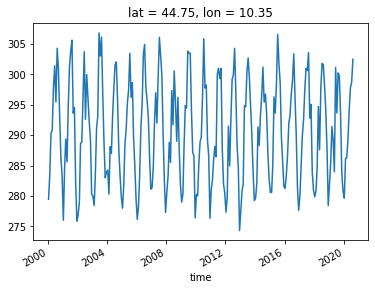

In [2]:
t2m_adjusted[:,5,18].plot()

<AxesSubplot:>

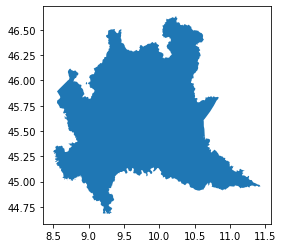

In [12]:
import geopandas as gpd
from shapely.geometry import Point

from shapely import speedups
speedups.disable()

regione = gpd.read_file('../resources/regione/regione_2015.shp')

regione.to_crs(epsg=4326, inplace=True)
regione.plot()

In [14]:
lats = t2m_adjusted.lat
lons = t2m_adjusted.lon

ammoniaca_lats = ammoniaca.lat
ammoniaca_lons = ammoniaca.lon

coords = [(lat, lon) for lat in lats.to_series() for lon in lons.to_series().tolist()]
ammoniaca_coords = [(lat, lon) for lat in ammoniaca_lats.to_series() for lon in ammoniaca_lons.to_series().tolist()]

lats = [coord[0] for coord in coords]
lons = [coord[1] for coord in coords]

ammoniaca_lats = [coord[0] for coord in ammoniaca_coords]
ammoniaca_lons = [coord[1] for coord in ammoniaca_coords]

NameError: name 'ammoniaca' is not defined

In [13]:

plt.scatter(lons, lats, c='r')
plt.scatter(ammoniaca_lons, ammoniaca_lats, c='y')

grid = [ (round(lat, 2), round(lon, 2)) for lat, lon in zip(lats, lons) if regione.geometry.contains(Point(lon, lat)).bool()]

lats = [coord[0] for coord in grid]
lons = [coord[1] for coord in grid]

regione.plot()
plt.scatter(lons, lats, c='r')

plt.show()

TypeError: type DataArray doesn't define __round__ method

In [8]:
t2m_lats = [round(lat, 2) for lat in t2m_adjusted.lat.to_series().tolist()]
t2m_lons = [round(lon, 2) for lon in t2m_adjusted.lon.to_series().tolist()]

data = np.zeros((len(t2m_lats), len(t2m_lons)))
data.fill(np.nan)

for lat_idx, lat in enumerate(t2m_lats):
    for lon_idx, lon in enumerate(t2m_lons):
        if (lat, lon) in grid:
            data[lat_idx][lon_idx] = np.mean(t2m[:12, lat_idx, lon_idx].to_series().tolist())
            
mean_t2m = xr.DataArray(data, coords=[t2m_lats, t2m_lons], dims=['lat', 'lon'])
mean_t2m.plot()

NameError: name 'grid' is not defined

In [2]:
from workbench import adjust_t2m_grid

adjust_t2m_grid("../datasets/ammoniaca.nc", "../datasets/temperature.nc")

ModuleNotFoundError: No module named 'workbench.py'; 'workbench' is not a package